# Prueba Utilizacion dlib

Dlib es un framework en C++ para IA que incluye herramientas para la detección e identificación de caras

Probaremos la detección de rostros sobre algunos de los integrantes de la serie "Black List"

In [20]:
import cv2
from matplotlib import pyplot as plt


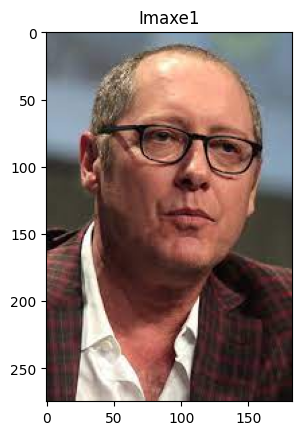

In [11]:
# Importamos la imagen de James Spader

image = cv2.imread("imagen/JamesSpader.jpeg")
imaxe_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(imaxe_color)
plt.title('Imaxe1')
plt.show()


Para trabajar con el detector de rostros es necesario descargar:
- Un sistema para predecir la forma y posición de la cara: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
- Una RNA para identificar la cara: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2


In [3]:
import dlib
import numpy as np

predictor_path ="./shape_predictor_5_face_landmarks.dat"
face_rec_model_path = "./dlib_face_recognition_resnet_model_v1.dat"


detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)


known_face_encodings = []
known_face_names = []


Los pasos para realizar una identificación son:
- Detectar la presencia de rostros, llamando a *detector*
    - detector va a devolver un array con rectángulos de color verde donde se detectó algo
- Para cada cara detectada:
    - Predecir la forma: llamando a *shape_predictor*, que antes se definió como *sp*
    - Obtener la firma de la cara a partir de la forma: chamar a face_recognition_model_v1, definido como *facerec*

La firma va a ser un vector de valores, que modeliza a cara. Para identificar unha cara habrá que comparar la distancia lineal entre el vector obtido y unha lista de vectores conocidos previamente. Si esa distancia es inferior a 0.6 entonces se puede determinar que corresponden a la misma persona.

Para empezar hay que crear una lista de caras conocidas, por lo que tendremos que tener unha serie de fotos de las mismas. En el paso seguinte,  
la lista known_face_encodings va a almacenar el vector que identifica la cara con su nombre.

In [12]:

dets = detector(imaxe_color, 1)
print("Number of faces detected: {}".format(len(dets)))
posicions = dets[0]
display(posicions)
shape = sp(imaxe_color,posicions)

face_descriptor = np.array(facerec.compute_face_descriptor(imaxe_color, shape))
display(face_descriptor)

known_face_encodings.append((face_descriptor,"James Spader"))


Number of faces detected: 1


rectangle(55,56,163,163)

array([-0.05582998,  0.11070184,  0.02557176, -0.0645205 , -0.10716713,
        0.01352408, -0.05736245, -0.08128116,  0.12740207, -0.2017429 ,
        0.18174551, -0.03881601, -0.20340689,  0.00180118,  0.02328014,
        0.1222067 , -0.26646504, -0.12039395, -0.15155868, -0.08489539,
        0.02112226,  0.07886574,  0.04232859,  0.02547369, -0.13777646,
       -0.2613413 , -0.09292478, -0.07980603,  0.14552641, -0.11951585,
       -0.04701044,  0.00257913, -0.11018226,  0.0118592 ,  0.00646406,
        0.0864547 , -0.0484584 , -0.07398585,  0.15807116,  0.01458531,
       -0.12006272, -0.05855017, -0.01138132,  0.24931249,  0.24878158,
        0.04795828, -0.0241938 , -0.0819815 ,  0.07661278, -0.31016302,
        0.05476168,  0.14115645,  0.0114506 ,  0.13914615,  0.03100182,
       -0.13377692,  0.10406502,  0.21415885, -0.14466245,  0.11348517,
        0.11385436, -0.18494987,  0.02793064,  0.0586994 ,  0.22580305,
        0.07011759, -0.10171576, -0.14968765,  0.08490808, -0.22

In [13]:
face_names = []

dets = detector(imaxe_color, 1)
tolerancia = 0.6
for d in dets:

    shape = sp(imaxe_color,d)
    face_descriptor = np.array(facerec.compute_face_descriptor(imaxe_color, shape))
    print(np.linalg.norm(face_descriptor - known_face_encodings[0][0]))
    # See if the face is a match for the known face(s)
    matches = [(np.linalg.norm(face_descriptor - match[0]), match[1]) for match in known_face_encodings if np.linalg.norm(face_descriptor - match[0]) <= tolerancia]
    print(matches)
    if len(matches) == 0:
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),"Desconocido"))
    else:
        carasOrdenadas = sorted(matches,key=lambda x: x[0]) 
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),carasOrdenadas[0][1]))


0.0
[(0.0, 'James Spader'), (0.0, 'James Spader')]


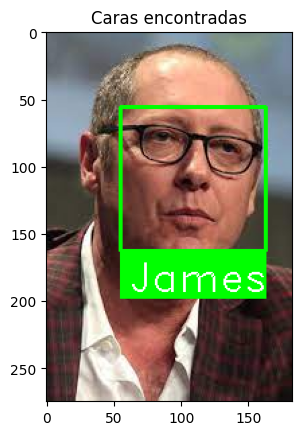

In [14]:
imaxeConMarcas = imaxe_color.copy() 
for (top, right, bottom, left), name in face_names:
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size

    color = (0, 255, 0) if not name=="Desconocido" else (0, 0, 255)
    # Draw a box around the face
    cv2.rectangle(imaxeConMarcas, (left, top), (right, bottom), color, 2)

    # Draw a label with a name below the face
    cv2.rectangle(imaxeConMarcas, (left, bottom + 35), (right, bottom), color, cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(imaxeConMarcas, name, (left + 6, bottom + 30), font, 1.0, (255, 255, 255), 1)

plt.imshow(imaxeConMarcas)
plt.title('Caras encontradas')
plt.show()        

Vamos a ver como se identifica a quien pertenece una cara.
Primero tenemos que presentar una (o varias) fotos, donde aparezca una persona y darle nombre.
Vamos a probar con la actriz Mozhan


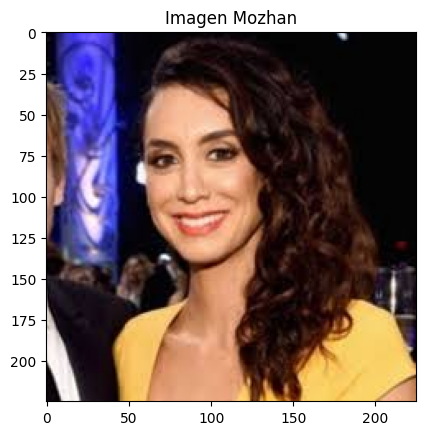

Number of faces detected: 1


rectangle(46,46,135,136)

array([-0.10081177,  0.1061456 ,  0.13772294, -0.0816827 , -0.01281981,
        0.08401415, -0.06455365, -0.14806044,  0.17424959, -0.14437225,
        0.16899337, -0.08001882, -0.29016984,  0.10054592, -0.03473897,
        0.18359154, -0.24985529, -0.10814429, -0.04500474, -0.09155277,
       -0.00733643,  0.01640636,  0.09524419,  0.10876389, -0.1589305 ,
       -0.34805867, -0.08597486, -0.03563069,  0.06492203, -0.06276528,
       -0.03240771, -0.04837279, -0.18919554,  0.10580247,  0.01616965,
        0.16231228, -0.07321751, -0.12020751,  0.18955521, -0.03567675,
       -0.22468524, -0.07333281,  0.10787186,  0.25120968,  0.22983673,
        0.00434676, -0.02527533, -0.02363241,  0.088829  , -0.29755831,
        0.0765494 ,  0.14466833,  0.04609191,  0.09202178,  0.10807562,
       -0.14602934, -0.04549782,  0.22522804, -0.06171086,  0.07213198,
        0.04748721, -0.07334399,  0.05890421, -0.04224126,  0.24205323,
        0.13694726, -0.17572516, -0.15593976,  0.1731602 , -0.14

In [15]:

Mozhan = cv2.imread("imagen/MozhanMarno.jpeg")
imaxePhillColor = cv2.cvtColor(Mozhan, cv2.COLOR_BGR2RGB)

plt.imshow(imaxePhillColor)
plt.title('Imagen Mozhan')
plt.show()

dets = detector(Mozhan, 1)
print("Number of faces detected: {}".format(len(dets)))
posicions = dets[0]
display(posicions)
shape = sp(Mozhan,posicions)

face_descriptor = np.array(facerec.compute_face_descriptor(Mozhan, shape))
display(face_descriptor)

known_face_encodings.append((face_descriptor,"Mozhan Marno"))



Ahora cogemos la foto donde están retratados varios integrantes de la serie "Black List"
y le pasamos el reconocimiento de caras.

Al final tendremos que ver los rectágulos con las caras de James Spader y Mozhan Marno resaltadas

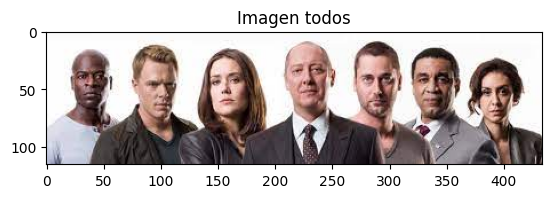

In [16]:
imaxeTodos = cv2.imread("imagen/blackList.jpeg")
imaxeTodosColor = cv2.cvtColor(imaxeTodos, cv2.COLOR_BGR2RGB)

plt.imshow(imaxeTodosColor)
plt.title('Imagen todos')
plt.show()


0.7380292933799205
[]
0.8377898425278472
[]
0.4297884756232489
[(0.4297884756232489, 'James Spader'), (0.4297884756232489, 'James Spader')]
0.7289023015520834
[(0.5160054440099974, 'Mozhan Marno'), (0.5160054440099974, 'Mozhan Marno'), (0.5160054440099974, 'Mozhan Marno')]
0.7153212853623396
[]
0.9421173201783697
[]
1.0056812281238
[]


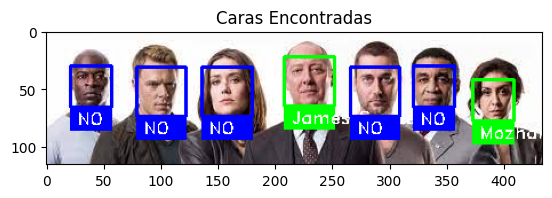

In [19]:
face_names = []

dets = detector(imaxeTodosColor, 1)
tolerancia = 0.6
for d in dets:

    shape = sp(imaxeTodosColor,d)
    face_descriptor = np.array(facerec.compute_face_descriptor(imaxeTodosColor, shape))
    print(np.linalg.norm(face_descriptor - known_face_encodings[0][0]))
    # See if the face is a match for the known face(s)
    matches = [(np.linalg.norm(face_descriptor - match[0]), match[1]) for match in known_face_encodings if np.linalg.norm(face_descriptor - match[0]) <= tolerancia]
    print(matches)
    if len(matches) == 0:
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),"NO"))
    else:
        carasOrdenadas = sorted(matches,key=lambda x: x[0]) 
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),carasOrdenadas[0][1]))
imaxeConMarcas = imaxeTodosColor.copy() 
for (top, right, bottom, left), name in face_names:
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size

    color = (0, 255, 0)
    if name=="NO":
        color = (0, 0, 255)
    # Draw a box around the face
    cv2.rectangle(imaxeConMarcas, (left, top), (right, bottom), color, 2)

    # Draw a label with a name below the facehan 
    cv2.rectangle(imaxeConMarcas, (left, bottom + 20), (right, bottom), color, cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(imaxeConMarcas, name, (left + 6, bottom + 15), font, 0.5, (255, 255, 255), 1)

plt.imshow(imaxeConMarcas)
plt.title('Caras Encontradas')
plt.show()      